# Analyzing Distance Information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# special matplotlib argument for improved plots
#from matplotlib import rcParams
#sns.set_style("whitegrid")
#sns.set_context("talk")

In [2]:
station_info = pd.read_csv('./data/processed/station_info_extended.csv')
subs = pd.read_csv('./data/processed/subscribers_1.csv')
nonsubs = pd.read_csv('./data/processed/nonsubscribers_1.csv')

In [3]:
subs = subs.drop('Unnamed: 0', axis=1)
nonsubs = nonsubs.drop('Unnamed: 0', axis=1)
station_info = station_info.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [4]:
subs.head(3)

,Trip Duration,Start Time,Stop Time,Start Station ID,End Station ID,Bike ID,User Type,Birth Year,Gender,start_year,start_month,start_day,start_hour,start_dayofweek,stop Time,stop_year,stop_month,stop_day,stop_hour,stop_dayofweek
0,8.266667,2016-04-01 00:00:26,4/1/2016 00:08:42,254,236,19704,Subscriber,1984.0,1,2016,4,1,0,4,2016-04-01 00:08:42,2016,4,1,0,4
1,1.733333,2016-04-01 00:00:27,4/1/2016 00:02:12,311,350,21555,Subscriber,1970.0,1,2016,4,1,0,4,2016-04-01 00:02:12,2016,4,1,0,4
2,2.133333,2016-04-01 00:00:30,4/1/2016 00:02:38,3064,3059,17430,Subscriber,1986.0,1,2016,4,1,0,4,2016-04-01 00:02:38,2016,4,1,0,4


In [5]:
nonsubs.head(3)

,Trip Duration,Start Time,Stop Time,Start Station ID,End Station ID,Bike ID,User Type,Birth Year,Gender,start_year,start_month,start_day,start_hour,start_dayofweek,stop Time,stop_year,stop_month,stop_day,stop_hour,stop_dayofweek
0,11.566667,2016-04-01 00:05:13,4/1/2016 00:16:48,300,383,15294,Customer,NaN,0,2016,4,1,0,4,2016-04-01 00:16:48,2016,4,1,0,4
1,17.550000,2016-04-01 00:05:19,4/1/2016 00:22:52,3176,164,17018,Customer,NaN,0,2016,4,1,0,4,2016-04-01 00:22:52,2016,4,1,0,4
2,22.566667,2016-04-01 00:05:52,4/1/2016 00:28:26,3143,167,15773,Customer,NaN,0,2016,4,1,0,4,2016-04-01 00:28:26,2016,4,1,0,4


In [6]:
station_info.head(3)

,index,st_id,name,latitude,longitude,closest_college,closest_college_distance,closest_subway,closest_subway_distance,closest_theater,closest_theater_distance,closest_museum,closest_museum_distance
0,214,72,W 52 St & 11 Ave,40.767272,-73.993929,American Academy Mcallister Institute Of Funer...,0.449863,8th Ave & 50th St at NW corner,0.836766,Julia Miles Theater,0.509623,Intrepid Sea-Air-Space Museum,0.648424
1,867,79,Franklin St & W Broadway,40.719116,-74.006667,Borough Of Manhattan Comm College (Cuny),0.438224,West Broadway & Franklin St at SW corner,0.012754,Ontological Hysteric Theater,0.179887,Jackie Robinson Museum,0.470931
2,646,82,St James Pl & Pearl St,40.711174,-74.000165,Pace University / New York City Campus,0.390559,Centre St & Chambers St at SE corner,0.372382,Michael Schimmel Center for the Arts at Pace U...,0.416180,South Street Seaport Museum,0.590027


In [7]:
sub_pu = subs.groupby('Start Station ID').size()
sub_do = subs.groupby('End Station ID').size()
subs_st_counts = pd.concat([sub_pu, sub_do], axis=1).reset_index()
subs_st_counts = subs_st_counts.dropna().astype(int)
subs_st_counts.columns = ['st_id', 'pickup', 'dropoff']

In [8]:
subs_st_counts.head(3)

,st_id,pickup,dropoff
0,72,29835,29418
1,79,23872,24628
2,82,9359,9253


In [9]:
dist_info = station_info[['st_id', 'closest_college_distance', 'closest_subway_distance', 'closest_theater_distance', 'closest_museum_distance']]

In [10]:
dist_info.head(3)

,st_id,closest_college_distance,closest_subway_distance,closest_theater_distance,closest_museum_distance
0,72,0.449863,0.836766,0.509623,0.648424
1,79,0.438224,0.012754,0.179887,0.470931
2,82,0.390559,0.372382,0.416180,0.590027


In [11]:
subs_st_counts = subs_st_counts.merge(dist_info, on='st_id')

In [12]:
subs_st_counts.head(3)

,st_id,pickup,dropoff,closest_college_distance,closest_subway_distance,closest_theater_distance,closest_museum_distance
0,72,29835,29418,0.449863,0.836766,0.509623,0.648424
1,79,23872,24628,0.438224,0.012754,0.179887,0.470931
2,82,9359,9253,0.390559,0.372382,0.416180,0.590027


In [13]:
subs_st_counts = subs_st_counts.drop(subs_st_counts.index[475])

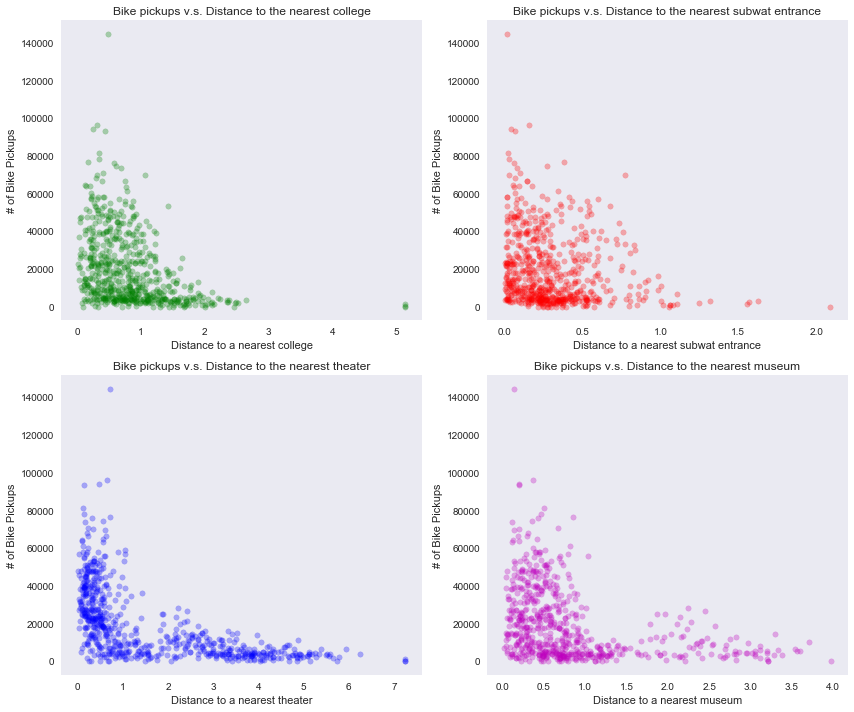

In [96]:
# Scatter plot pickups against distances from colleges, subways, theaters, and museums for subscribers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
ax1.scatter(subs_st_counts.closest_college_distance, subs_st_counts.pickup, s=30, color='g', alpha=0.3)
ax1.set_title('Bike pickups v.s. Distance to the nearest college')
ax1.set_xlabel('Distance to a nearest college')
ax1.set_ylabel('# of Bike Pickups')
ax1.grid(False)

ax2.scatter(subs_st_counts.closest_subway_distance, subs_st_counts.pickup, s=30, color='r', alpha=0.3)
ax2.set_title('Bike pickups v.s. Distance to the nearest subwat entrance')
ax2.set_xlabel('Distance to a nearest subwat entrance')
ax2.set_ylabel('# of Bike Pickups')
ax2.grid(False)

ax3.scatter(subs_st_counts.closest_theater_distance, subs_st_counts.pickup, s=30, color='b', alpha=0.3)
ax3.set_title('Bike pickups v.s. Distance to the nearest theater')
ax3.set_xlabel('Distance to a nearest theater')
ax3.set_ylabel('# of Bike Pickups')
ax3.grid(False)

ax4.scatter(subs_st_counts.closest_museum_distance, subs_st_counts.pickup, s=30, color='m', alpha=0.3)
ax4.set_title('Bike pickups v.s. Distance to the nearest museum')
ax4.set_xlabel('Distance to a nearest museum')
ax4.set_ylabel('# of Bike Pickups')
ax4.grid(False)

plt.tight_layout()

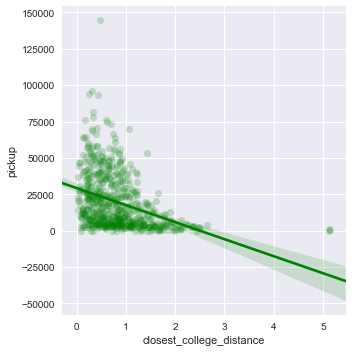

In [88]:
# Scatter  using Seaborn
ax = sns.lmplot('closest_college_distance', 'pickup', subs_st_counts, ci=95, 
                                   size=5, scatter_kws={"s": 50, "alpha": 0.2, 'color': 'g'}, line_kws={'color': 'g'})

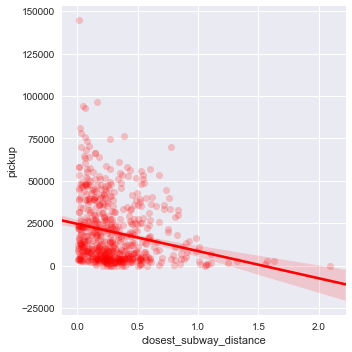

In [89]:
# Scatter  using Seaborn
ax = sns.lmplot('closest_subway_distance', 'pickup', subs_st_counts, ci=95, 
                                   size=5, scatter_kws={"s": 50, "alpha": 0.2, 'color': 'r'}, line_kws={'color': 'r'})

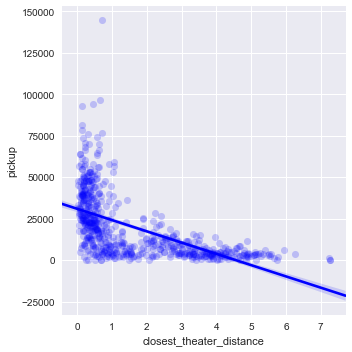

In [90]:
# Scatter  using Seaborn
ax = sns.lmplot('closest_theater_distance', 'pickup', subs_st_counts, ci=95, 
                                   size=5, scatter_kws={"s": 50, "alpha": 0.2, 'color': 'b'}, line_kws={'color': 'b'})

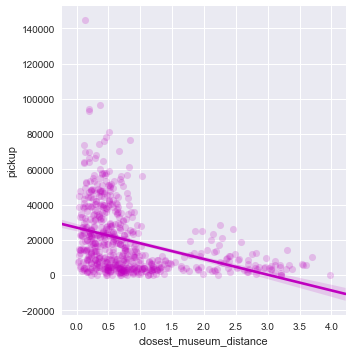

In [91]:
# Scatter  using Seaborn
ax = sns.lmplot('closest_museum_distance', 'pickup', subs_st_counts, ci=95, 
                                   size=5, scatter_kws={"s": 50, "alpha": 0.2, 'color': 'm'}, line_kws={'color': 'm'})

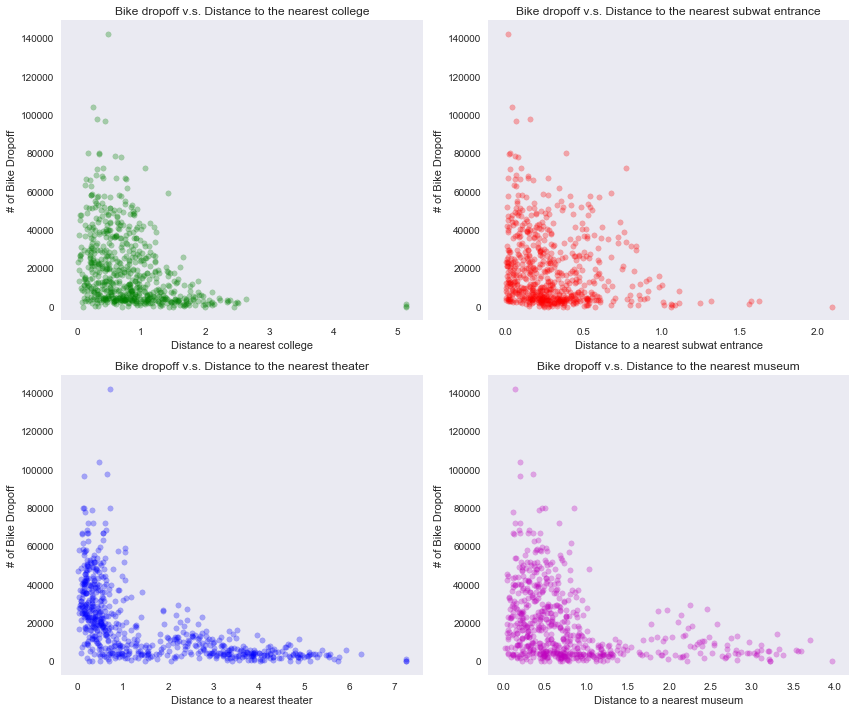

In [97]:
# Scatter plot dropoff against distances from colleges, subways, theaters, and museums for subscribers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
ax1.scatter(subs_st_counts.closest_college_distance, subs_st_counts.dropoff, s=30, color='g', alpha=0.3)
ax1.set_title('Bike dropoff v.s. Distance to the nearest college')
ax1.set_xlabel('Distance to a nearest college')
ax1.set_ylabel('# of Bike Dropoff')
ax1.grid(False)

ax2.scatter(subs_st_counts.closest_subway_distance, subs_st_counts.dropoff, s=30, color='r', alpha=0.3)
ax2.set_title('Bike dropoff v.s. Distance to the nearest subwat entrance')
ax2.set_xlabel('Distance to a nearest subwat entrance')
ax2.set_ylabel('# of Bike Dropoff')
ax2.grid(False)

ax3.scatter(subs_st_counts.closest_theater_distance, subs_st_counts.dropoff, s=30, color='b', alpha=0.3)
ax3.set_title('Bike dropoff v.s. Distance to the nearest theater')
ax3.set_xlabel('Distance to a nearest theater')
ax3.set_ylabel('# of Bike Dropoff')
ax3.grid(False)

ax4.scatter(subs_st_counts.closest_museum_distance, subs_st_counts.dropoff, s=30, color='m', alpha=0.3)
ax4.set_title('Bike dropoff v.s. Distance to the nearest museum')
ax4.set_xlabel('Distance to a nearest museum')
ax4.set_ylabel('# of Bike Dropoff')
ax4.grid(False)

plt.tight_layout()

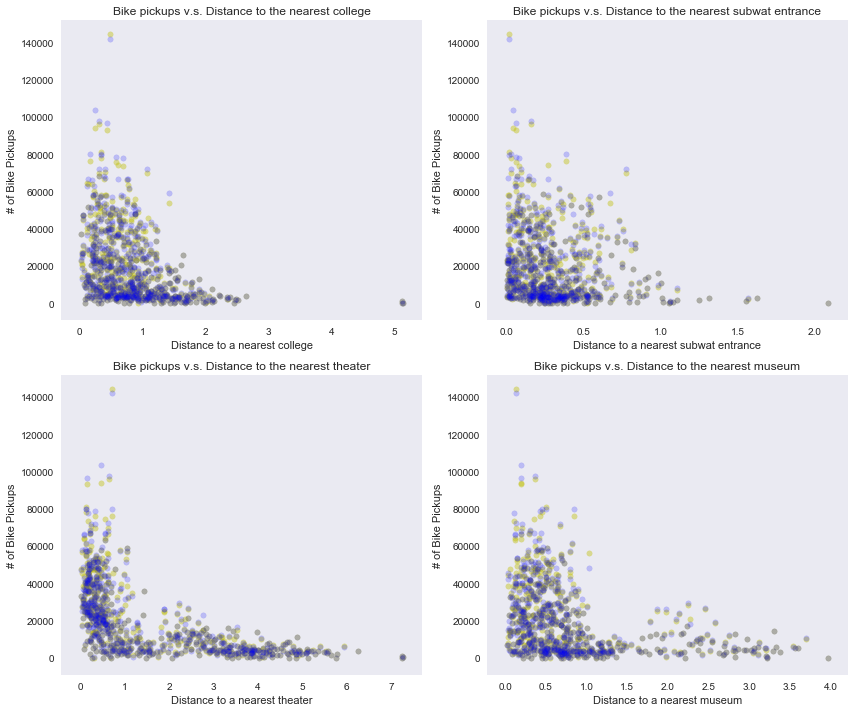

In [98]:
# Scatter plot pickups vs dropoffs for subscribers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
ax1.scatter(subs_st_counts.closest_college_distance, subs_st_counts.pickup, s=30, color='y', alpha=0.4)
ax1.scatter(subs_st_counts.closest_college_distance, subs_st_counts.dropoff, s=30, color='b', alpha=0.2)
ax1.set_title('Bike pickups v.s. Distance to the nearest college')
ax1.set_xlabel('Distance to a nearest college')
ax1.set_ylabel('# of Bike Pickups')
ax1.grid(False)

ax2.scatter(subs_st_counts.closest_subway_distance, subs_st_counts.pickup, s=30, color='y', alpha=0.4)
ax2.scatter(subs_st_counts.closest_subway_distance, subs_st_counts.dropoff, s=30, color='b', alpha=0.2)
ax2.set_title('Bike pickups v.s. Distance to the nearest subwat entrance')
ax2.set_xlabel('Distance to a nearest subwat entrance')
ax2.set_ylabel('# of Bike Pickups')
ax2.grid(False)

ax3.scatter(subs_st_counts.closest_theater_distance, subs_st_counts.pickup, s=30, color='y', alpha=0.4)
ax3.scatter(subs_st_counts.closest_theater_distance, subs_st_counts.dropoff, s=30, color='b', alpha=0.2)
ax3.set_title('Bike pickups v.s. Distance to the nearest theater')
ax3.set_xlabel('Distance to a nearest theater')
ax3.set_ylabel('# of Bike Pickups')
ax3.grid(False)

ax4.scatter(subs_st_counts.closest_museum_distance, subs_st_counts.pickup, s=30, color='y', alpha=0.4)
ax4.scatter(subs_st_counts.closest_museum_distance, subs_st_counts.dropoff, s=30, color='b', alpha=0.2)
ax4.set_title('Bike pickups v.s. Distance to the nearest museum')
ax4.set_xlabel('Distance to a nearest museum')
ax4.set_ylabel('# of Bike Pickups')
ax4.grid(False)

plt.tight_layout()

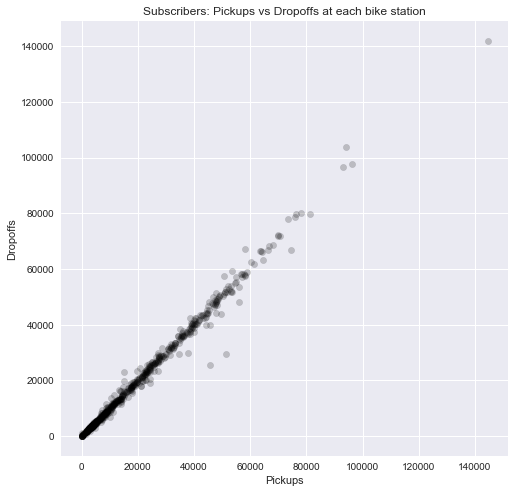

In [101]:
# Scatter Pickup vs Dropoff (total) for subscribers
plt.figure(figsize=(8,8))
plt.scatter(subs_st_counts.pickup, subs_st_counts.dropoff, s=40, color='k', alpha=0.2)
plt.xlabel('Pickups')
plt.ylabel('Dropoffs')
plt.title('Subscribers: Pickups vs Dropoffs at each bike station')

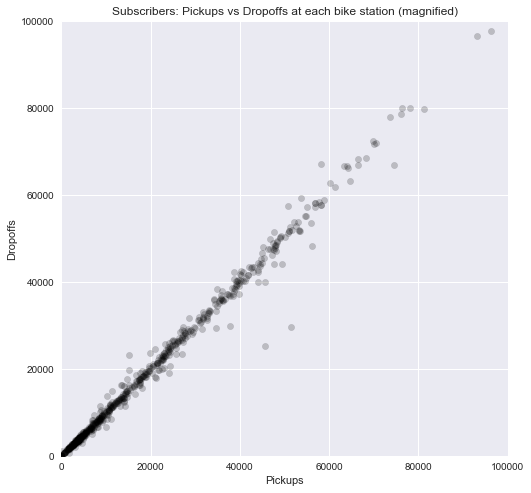

In [102]:
# Scatter Pickup vs Dropoff (total) for subscribers
plt.figure(figsize=(8,8))
plt.scatter(subs_st_counts.pickup, subs_st_counts.dropoff, s=40, color='k', alpha=0.2)
plt.xlim([0, 100000])
plt.ylim([0, 100000])
plt.xlabel('Pickups')
plt.ylabel('Dropoffs')
plt.title('Subscribers: Pickups vs Dropoffs at each bike station (magnified)')

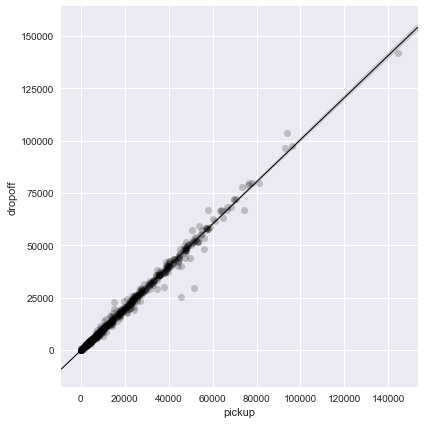

In [108]:
# Scatter Pickup vs Dropoff (total) for subscribers using Seaborn
sns.lmplot('pickup', 'dropoff', subs_st_counts, ci=95, 
                                   size=6, scatter_kws={"s": 50, "alpha": 0.2, 'color': 'k'}, line_kws={'color': 'k', 'lw': 1})

In [19]:
nonsub_pu = nonsubs.groupby('Start Station ID').size()
nonsub_do = nonsubs.groupby('End Station ID').size()
nonsubs_st_counts = pd.concat([nonsub_pu, nonsub_do], axis=1).reset_index()
nonsubs_st_counts = nonsubs_st_counts.dropna().astype(int)
nonsubs_st_counts.columns = ['st_id', 'pickup', 'dropoff']

In [20]:
nonsubs_st_counts = nonsubs_st_counts.merge(dist_info, on='st_id')
nonsubs_st_counts = nonsubs_st_counts.drop(nonsubs_st_counts.index[475])

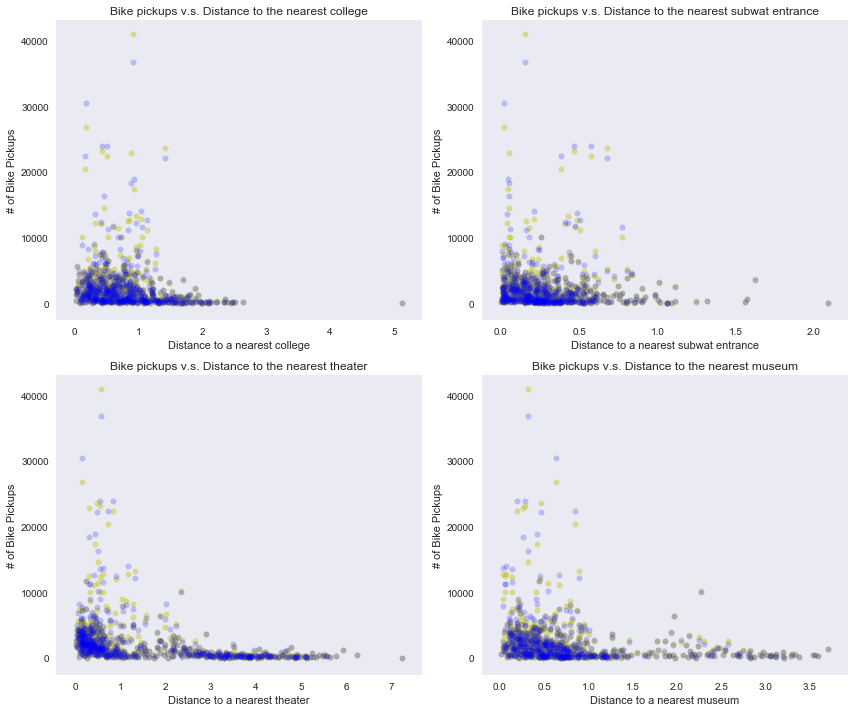

In [109]:
# Scatter plot pickups vs dropoffs for non-subscribers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
ax1.scatter(nonsubs_st_counts.closest_college_distance, nonsubs_st_counts.pickup, s=30, color='y', alpha=0.4)
ax1.scatter(nonsubs_st_counts.closest_college_distance, nonsubs_st_counts.dropoff, s=30, color='b', alpha=0.2)
ax1.set_title('Bike pickups v.s. Distance to the nearest college')
ax1.set_xlabel('Distance to a nearest college')
ax1.set_ylabel('# of Bike Pickups')
ax1.grid(False)

ax2.scatter(nonsubs_st_counts.closest_subway_distance, nonsubs_st_counts.pickup, s=30, color='y', alpha=0.4)
ax2.scatter(nonsubs_st_counts.closest_subway_distance, nonsubs_st_counts.dropoff, s=30, color='b', alpha=0.2)
ax2.set_title('Bike pickups v.s. Distance to the nearest subwat entrance')
ax2.set_xlabel('Distance to a nearest subwat entrance')
ax2.set_ylabel('# of Bike Pickups')
ax2.grid(False)

ax3.scatter(nonsubs_st_counts.closest_theater_distance, nonsubs_st_counts.pickup, s=30, color='y', alpha=0.4)
ax3.scatter(nonsubs_st_counts.closest_theater_distance, nonsubs_st_counts.dropoff, s=30, color='b', alpha=0.2)
ax3.set_title('Bike pickups v.s. Distance to the nearest theater')
ax3.set_xlabel('Distance to a nearest theater')
ax3.set_ylabel('# of Bike Pickups')
ax3.grid(False)

ax4.scatter(nonsubs_st_counts.closest_museum_distance, nonsubs_st_counts.pickup, s=30, color='y', alpha=0.4)
ax4.scatter(nonsubs_st_counts.closest_museum_distance, nonsubs_st_counts.dropoff, s=30, color='b', alpha=0.2)
ax4.set_title('Bike pickups v.s. Distance to the nearest museum')
ax4.set_xlabel('Distance to a nearest museum')
ax4.set_ylabel('# of Bike Pickups')
ax4.grid(False)

plt.tight_layout()

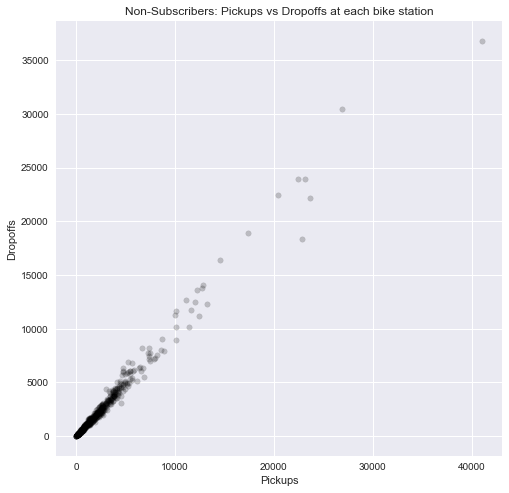

In [110]:
# Scatter Pickup vs Dropoff (total) for non-subscribers
plt.figure(figsize=(8,8))
plt.scatter(nonsubs_st_counts.pickup, nonsubs_st_counts.dropoff, s=30, color='k', alpha=0.2)
plt.xlabel('Pickups')
plt.ylabel('Dropoffs')
plt.title('Non-Subscribers: Pickups vs Dropoffs at each bike station')

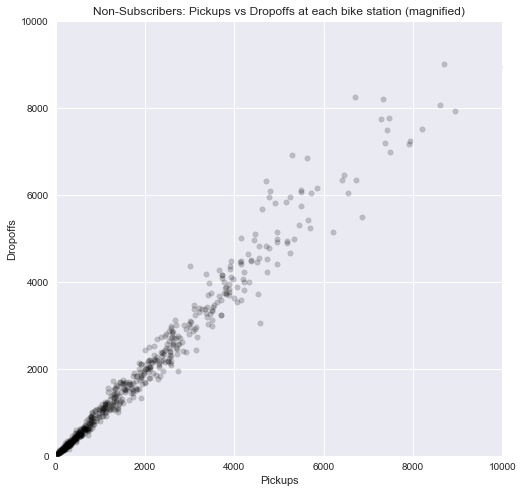

In [111]:
# Scatter Pickup vs Dropoff (total) for non-subscribers
plt.figure(figsize=(8,8))
plt.scatter(nonsubs_st_counts.pickup, nonsubs_st_counts.dropoff, s=30, color='k', alpha=0.2)
plt.xlim([0, 10000])
plt.ylim([0, 10000])
plt.xlabel('Pickups')
plt.ylabel('Dropoffs')
plt.title('Non-Subscribers: Pickups vs Dropoffs at each bike station (magnified)')

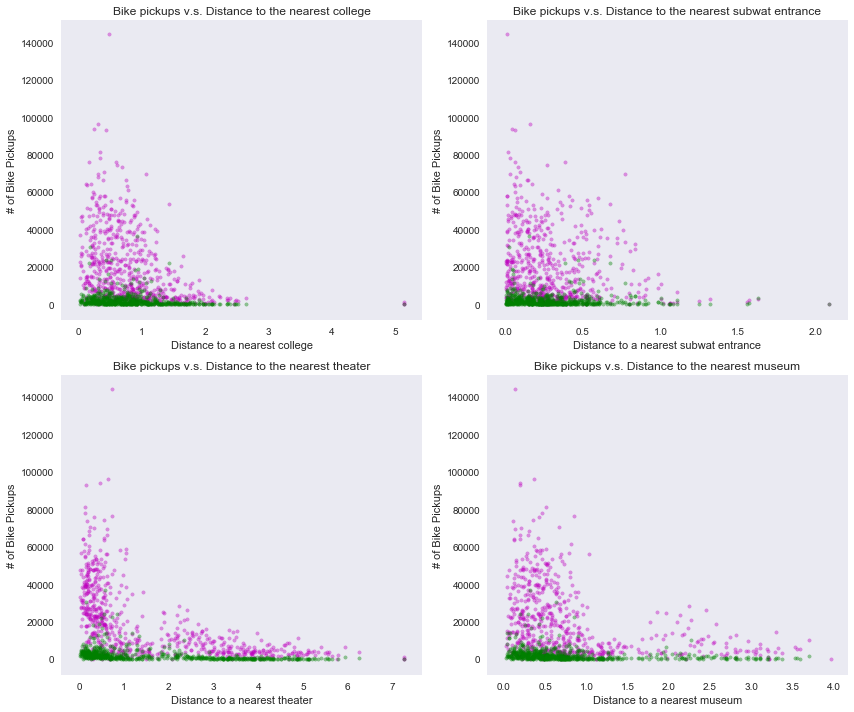

In [24]:
# Scatter plot pickups: subscribers vs non-subscribers
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
ax1.scatter(subs_st_counts.closest_college_distance, subs_st_counts.pickup, s=12, color='m', alpha=0.4)
ax1.scatter(nonsubs_st_counts.closest_college_distance, nonsubs_st_counts.dropoff, s=12, color='g', alpha=0.4)
ax1.set_title('Bike pickups v.s. Distance to the nearest college')
ax1.set_xlabel('Distance to a nearest college')
ax1.set_ylabel('# of Bike Pickups')
ax1.grid(False)

ax2.scatter(subs_st_counts.closest_subway_distance, subs_st_counts.pickup, s=12, color='m', alpha=0.4)
ax2.scatter(nonsubs_st_counts.closest_subway_distance, nonsubs_st_counts.dropoff, s=12, color='g', alpha=0.4)
ax2.set_title('Bike pickups v.s. Distance to the nearest subwat entrance')
ax2.set_xlabel('Distance to a nearest subwat entrance')
ax2.set_ylabel('# of Bike Pickups')
ax2.grid(False)

ax3.scatter(subs_st_counts.closest_theater_distance, subs_st_counts.pickup, s=12, color='m', alpha=0.4)
ax3.scatter(nonsubs_st_counts.closest_theater_distance, nonsubs_st_counts.dropoff, s=12, color='g', alpha=0.4)
ax3.set_title('Bike pickups v.s. Distance to the nearest theater')
ax3.set_xlabel('Distance to a nearest theater')
ax3.set_ylabel('# of Bike Pickups')
ax3.grid(False)

ax4.scatter(subs_st_counts.closest_museum_distance, subs_st_counts.pickup, s=12, color='m', alpha=0.4)
ax4.scatter(nonsubs_st_counts.closest_museum_distance, nonsubs_st_counts.dropoff, s=12, color='g', alpha=0.4)
ax4.set_title('Bike pickups v.s. Distance to the nearest museum')
ax4.set_xlabel('Distance to a nearest museum')
ax4.set_ylabel('# of Bike Pickups')
ax4.grid(False)

plt.tight_layout()

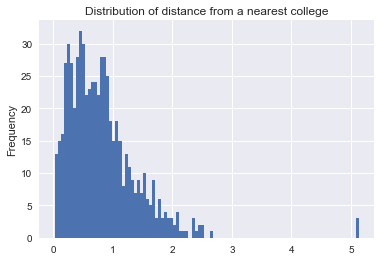

In [48]:
ax = subs_st_counts.closest_college_distance.plot(kind='hist', bins=100)
ax.set_title('Distribution of distance from a nearest college')

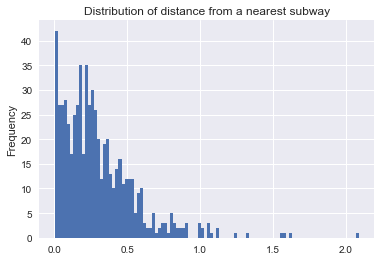

In [49]:
ax = subs_st_counts.closest_subway_distance.plot(kind='hist', bins=100)
ax.set_title('Distribution of distance from a nearest subway')

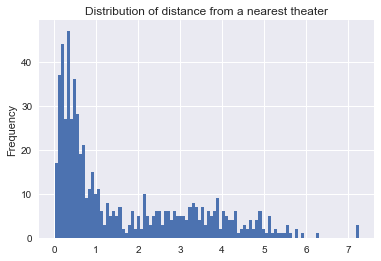

In [50]:
ax = subs_st_counts.closest_theater_distance.plot(kind='hist', bins=100)
ax.set_title('Distribution of distance from a nearest theater')

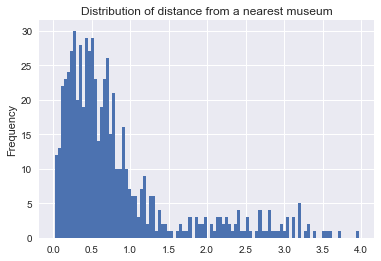

In [51]:
ax = subs_st_counts.closest_museum_distance.plot(kind='hist', bins=100)
ax.set_title('Distribution of distance from a nearest museum')